In [7]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 46
pd.options.display.max_rows = 50
from pylab import rcParams

In [8]:
cars = pd.read_csv('D:\\UW\\2nd semester\\ML\\Project\\cars.csv', sep = ',')
cars.columns = cars.columns.str.replace(" ", "_")
print(cars.shape)
print(cars.dtypes)

(45787, 19)
Unnamed:_0          int64
Body_Type          object
Condition          object
Cylinders           int64
Engine            float64
Exterior_Color     object
For_Sale_By        object
Interior_Color     object
Make               object
Mileage           float64
Model              object
Price               int64
Transmission       object
Vehicle_Title      object
Warranty           object
Year                int64
Drive_Type         object
Fuel_Type          object
Turbo              object
dtype: object


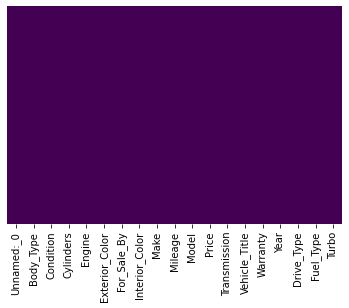

In [9]:
sns.heatmap(cars.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Data format and consistency are OK.

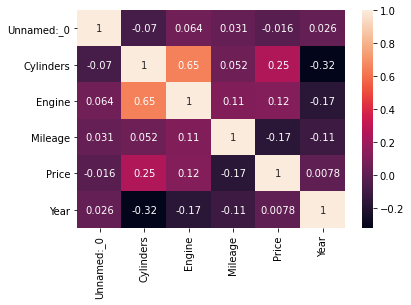

In [10]:
sns.heatmap(cars.corr(), annot=True)

No critical correlation observed.

In [11]:
cars = cars.drop(['Unnamed:_0', 'Model'], axis=1)

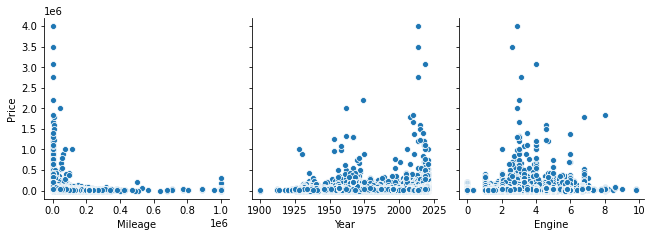

In [12]:
rcParams['figure.figsize'] = 8,6
p = sns.pairplot(cars, x_vars=['Mileage','Year','Engine'], y_vars='Price', height=3, aspect=1)

Some variables seems to have linear relations with dependent variables, but some - don't.

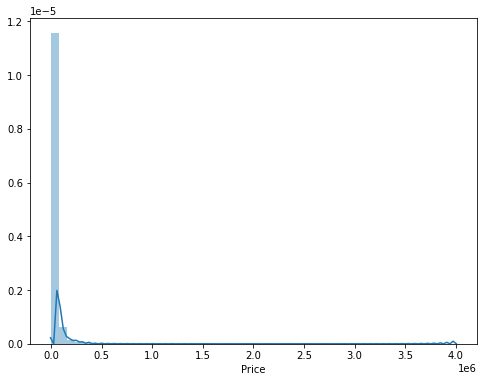

In [13]:
sns.distplot(cars['Price'], kde=True)

In [14]:
print(cars['Price'].mean())
print(cars['Price'].std())
print('Outliers border :',cars['Price'].mean() + cars['Price'].std())

39382.55402188394
65001.13097501399
Outliers border : 104383.68499689794


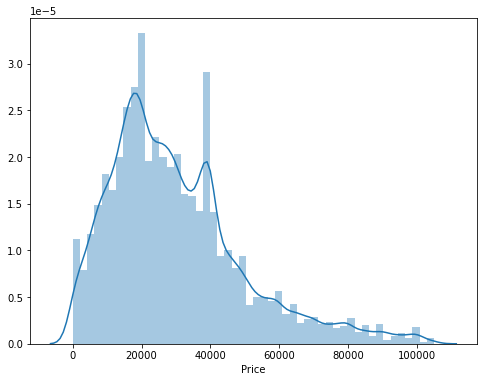

In [15]:
sns.distplot(cars.loc[cars['Price']<105000, 'Price'], kde=True)

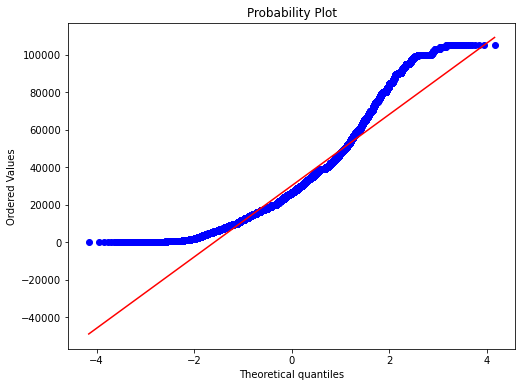

In [18]:
import scipy.stats as stats
rcParams['figure.figsize'] = 8,6
stats.probplot(cars.loc[(cars['Price']<=105000)&(cars['Price']>=0), 'Price'], dist="norm", plot=plt)
plt.show()

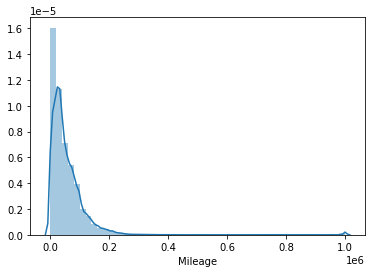

In [19]:
rcParams['figure.figsize'] = 6,4
sns.distplot(cars['Mileage'], kde=True)

In [20]:
print(cars['Mileage'].mean())
print(cars['Mileage'].std())
print('Outliers border :',cars['Mileage'].mean() + cars['Mileage'].std()*3)

50879.341388765366
68891.47773385601
Outliers border : 257553.7745903334


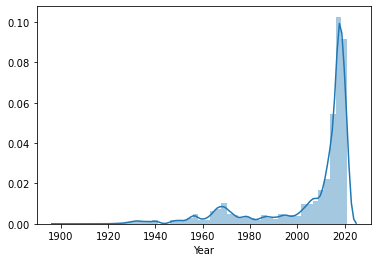

In [21]:
sns.distplot(cars['Year'], kde=True)

In [22]:
cars_lim = cars.loc[(cars['Price']<=70000) & (cars['Price']>=2000), ]
cars_lim = cars_lim.loc[cars_lim['Mileage']<=260000, ]
cars_lim = cars_lim.loc[cars_lim['Year']>=2000, ]

Trying to make data closer to normality and less disbananced - we cut the outliers.

In [23]:
y = cars_lim.loc[:,cars_lim.columns== 'Price']
x = cars_lim.loc[:,cars_lim.columns!= 'Price']
x = pd.get_dummies(x, drop_first = True)
x

,Cylinders,Engine,Mileage,Year,Body_Type_Coupe,Body_Type_Other,Body_Type_Pickup,Body_Type_SUV,Body_Type_Sedan,Body_Type_Van,Body_Type_Wagon,Condition_Used,Exterior_Color_Blue,Exterior_Color_Gray,Exterior_Color_Green,Exterior_Color_Other,Exterior_Color_Red,Exterior_Color_Silver,Exterior_Color_White,For_Sale_By_Private Owner,Interior_Color_Brown,Interior_Color_Gray,Interior_Color_Other,Interior_Color_Red,Interior_Color_Tan,Make_BMW,Make_Cadillac,Make_Chevrolet,Make_Dodge,Make_Ford,Make_GMC,Make_Lexus,Make_Mercedes-Benz,Make_Other,Make_Porsche,Make_Ram,Make_Toyota,Transmission_Manual,Vehicle_Title_Other,Warranty_Yes,Drive_Type_AWD,Fuel_Type_Gasoline,Fuel_Type_Other,Turbo_Yes
41,6,2.0,77220.0,2007,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
42,6,3.5,81795.0,2009,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
43,4,2.3,80067.0,2008,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
44,4,2.3,108554.0,2007,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
45,6,3.5,40552.0,2017,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45782,8,6.7,81541.0,2015,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
45783,4,2.5,53022.0,2014,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45784,8,5.0,58127.0,2019,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
45785,8,5.0,1930.0,2020,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


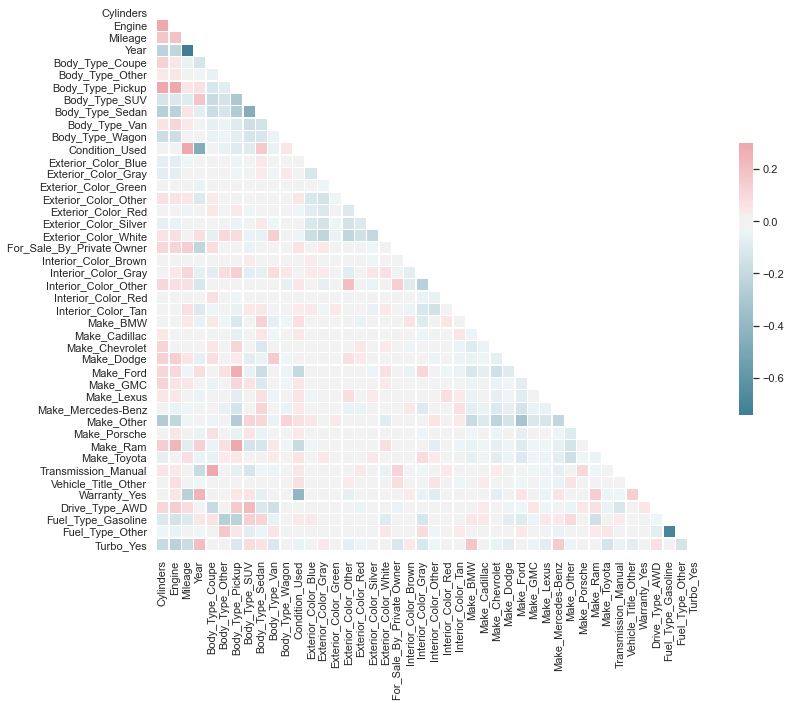

In [24]:
#correlation matrix for numerical variables

sns.set(style="white")
rcParams['figure.figsize'] = 14,10
corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5})

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 999)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
print('R^2:',model.score(x_train, y_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5678236716199802
Root Mean Squared Error: 9561.973311290069


In [26]:
#cross-validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
lm = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(lm, x_train, y_train, scoring='r2', cv=folds)
print(scores)
scores.mean()  

[0.56862039 0.56585176 0.5833586  0.5501286  0.56786489 0.55768595
 0.56761705 0.54824763 0.56552615 0.58490144]


0.5659802462228479

In [27]:
#feature selection

from scipy import stats
from sklearn import feature_selection

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

minfos=[]
for var in x.columns:
    print("\n", var)
    print("Pearson", stats.pearsonr(x[var], y['Price'].values))
    print("Mutual info", feature_selection.mutual_info_regression(x[var].values.reshape(-1,1), y['Price'].values))
    minfos.append(feature_selection.mutual_info_classif(x[var].values.reshape(-1,1), y['Price'].values))
    print("Chi2", feature_selection.chi2(x[var].values.reshape(-1,1),y['Price'].values))
    print("Anova", feature_selection.f_classif(x[var].values.reshape(-1,1), y['Price'].values))

imp = list(zip(minfos, x.columns))
imp.sort(reverse=True)
imp


 Cylinders
Pearson (0.2812736248509886, 0.0)
Mutual info [0.20371844]
Chi2 (array([8394.44228309]), array([7.39004292e-43]))
Anova (array([2.73209854]), array([0.]))

 Engine
Pearson (0.2560481045896825, 0.0)
Mutual info [0.47902304]
Chi2 (array([11473.68067412]), array([3.34429513e-258]))
Anova (array([3.49445728]), array([0.]))

 Mileage
Pearson (-0.44730371638407007, 0.0)
Mutual info [0.66497119]
Chi2 (array([6.2375051e+08]), array([0.]))
Anova (array([3.68084414]), array([0.]))

 Year
Pearson (0.425890078619266, 0.0)
Mutual info [0.26347337]
Chi2 (array([179.0274749]), array([1.]))
Anova (array([4.07829475]), array([0.]))

 Body_Type_Coupe
Pearson (0.057669753254338214, 7.47960206796171e-25)
Mutual info [0.01343953]
Chi2 (array([7741.15667611]), array([1.94761278e-18]))
Anova (array([1.3305573], dtype=float32), array([0.], dtype=float32))

 Body_Type_Other
Pearson (0.0503970027633676, 2.3780323601731055e-19)
Mutual info [0.01688347]
Chi2 (array([9535.05633983]), array([9.27452485e

[(array([1.38181941]), 'Condition_Used'),
 (array([1.3294426]), 'Fuel_Type_Gasoline'),
 (array([0.91695233]), 'Mileage'),
 (array([0.80111727]), 'Engine'),
 (array([0.7662032]), 'Year'),
 (array([0.73753902]), 'Cylinders'),
 (array([0.60285765]), 'Drive_Type_AWD'),
 (array([0.33154396]), 'Body_Type_SUV'),
 (array([0.30865169]), 'Turbo_Yes'),
 (array([0.24982613]), 'Make_Ford'),
 (array([0.245174]), 'Make_Other'),
 (array([0.20317936]), 'Interior_Color_Other'),
 (array([0.19948414]), 'Warranty_Yes'),
 (array([0.19175708]), 'Body_Type_Sedan'),
 (array([0.18235704]), 'Body_Type_Pickup'),
 (array([0.13102542]), 'Exterior_Color_White'),
 (array([0.12494864]), 'Interior_Color_Gray'),
 (array([0.0719993]), 'Vehicle_Title_Other'),
 (array([0.07187017]), 'Make_Mercedes-Benz'),
 (array([0.07124955]), 'For_Sale_By_Private Owner'),
 (array([0.05952921]), 'Exterior_Color_Other'),
 (array([0.05869985]), 'Make_Chevrolet'),
 (array([0.05583628]), 'Body_Type_Van'),
 (array([0.05135127]), 'Exterior_Colo

In [28]:
#omitting less significant variables

imp.sort(reverse=False)
selection = []
for i in range(len(imp)):
    selection.append(imp[i][1]) 

selection_copy = selection.copy()
y2 = y.copy()
for var in selection:
    cars_selection = x[selection_copy]
    data = cars_selection.to_numpy()
    target = y['Price']
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 999)
    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    lm = LinearRegression().fit(x_train, y_train)
    scores = cross_val_score(lm, x_test, y_test, scoring='r2', cv=folds)
    print('Mean score including '+var, scores.mean())
    selection_copy.remove(var)

Mean score including Interior_Color_Red 0.5767870598970701
Mean score including Exterior_Color_Green 0.5753178496217974
Mean score including Make_Porsche 0.5756440471120866
Mean score including Make_Cadillac 0.5697795296023271
Mean score including Interior_Color_Brown 0.5683496338181147
Mean score including Make_GMC 0.5676771470961011
Mean score including Make_Toyota 0.564953283049813
Mean score including Make_Ram 0.5634197725909657
Mean score including Transmission_Manual 0.5578219850051438
Mean score including Make_Lexus 0.5530632779016077
Mean score including Exterior_Color_Blue 0.5523668262197278
Mean score including Make_Dodge 0.5519118784998371
Mean score including Body_Type_Coupe 0.5498056230456216
Mean score including Make_BMW 0.549866591511038
Mean score including Interior_Color_Tan 0.5498965797893179
Mean score including Exterior_Color_Red 0.5500077036260885
Mean score including Exterior_Color_Silver 0.5499170439424448
Mean score including Body_Type_Wagon 0.5493247922453278
M

Feature selection process shows that we have better result with all set of variables.

In [29]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     957.7
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:17:35   Log-Likelihood:            -3.3695e+05
No. Observations:               31813   AIC:                         6.740e+05
Df Residuals:                   31768   BIC:                         6.744e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [30]:
#cut insignificant variables
X2_cut = X2.loc[:,(X2.columns != 'Exterior_Color_Green') & (X2.columns != 'Exterior_Color_Other')&(X2.columns != 'Interior_Color_Tan')&(X2.columns != 'Warranty_Yes')]

In [31]:
est = sm.OLS(y, X2_cut)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     1053.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:17:35   Log-Likelihood:            -3.3695e+05
No. Observations:               31813   AIC:                         6.740e+05
Df Residuals:                   31772   BIC:                         6.743e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X2_cut, y, test_size = 0.2, random_state = 999)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Coefficient of determination:',model.score(x_train, y_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  	
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  	

Coefficient of determination: 0.5677995317740951
Root Mean Squared Error: 9558.813068210067
Mean Absolute Error: 7041.248440572241
Mean Squared Error: 91370907.27298357


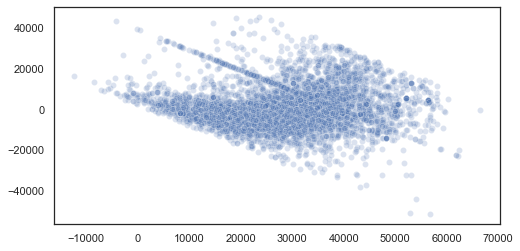

In [40]:
#check homoscedastisity
rcParams['figure.figsize'] = 8,4
residuals = y_test.values-y_pred
sns.scatterplot(y_pred[:,0],residuals[:,0], alpha = 0.2)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_test)
lzip(name, test)

Null Hypothesis: Error terms are homoscedastic

In [47]:
from scipy.stats import bartlett
test = bartlett(y_test['Price'], y_pred[:,0])
print(test)

BartlettResult(statistic=521.4888846491548, pvalue=2.0073181104346726e-115)


Predicted values don't have the same variation as actual ones. 

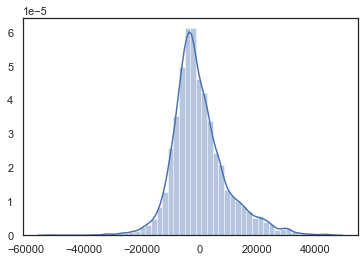

In [36]:
#distribution of residuals
rcParams['figure.figsize'] = 6,4
sns.distplot(residuals,kde=True)

Residuals are normally distributed.

In [37]:
#auto-correlation in residuals
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.5067609935520894

No auto correlation in residuals. 

The results of regression are not satisfactory.

We can look for new variables, for example, do not liminitg Car Makers or add models/colors/car's options and complectaion.  